# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

600

In [3]:
#Create a list to break the cities into groups of 50s

j = len(cities)
remainder = j%50
quotient = int(j/50)
list_of_city_df=[]
df_list = []
for i in range(quotient+1):
    df_list.append(i*50)
for k in range(len(df_list)-1):
    temp_list = cities[df_list[k]:df_list[k+1]]
    list_of_city_df.append(temp_list)
if(remainder != 0):
    list_of_city_df.append(cities[df_list[-1]:])


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Build partial url to fetch weather information for cities in the list
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
citylist = []
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
dte = []
#weather_api_key = "89452b40cb3119b4ac559944f77eaccf"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print("Beginning Data Retrieval")
invalid_city=0
# for each city in each list in list_of_city_df, make the api call to retrieve city data
# update the following lists - city, lat, lng, maxtemp, humidity, cloudiness, winspeed, country, dte,
# from each response to add the details for the current city.
for i in range(len(list_of_city_df)):
    time.sleep(2)
    for city in list_of_city_df[i]:
        try:
            response = requests.get(query_url + city).json()
            print("Processing data for " + city + ", subset "+str(i)+" :")
            citylist.append(city)
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            maxtemp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            windspeed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            dte.append(response['dt'])
        except:
            print(city + " not found")
            invalid_city = invalid_city+1
            #if city is not found, or there is an error, update the lists to remove any data that was added for this city
            maxlength = len(citylist)
            if maxlength > 0:
                if(len(lat)) == maxlength:
                    lat.pop()
                if(len(lng)) == maxlength :
                    lng.pop()
                if(len(maxtemp)) == maxlength:
                    maxtemp.pop()
                if(len(humidity)) == maxlength:
                    humidity.pop()
                if(len(cloudiness)) == maxlength:
                    cloudiness.pop()
                if(len(windspeed)) == maxlength:
                    windspeed.pop()
                if(len(country)) == maxlength:
                    country.pop()
                if(len(dte)) == maxlength:
                    dte.pop()
                citylist.pop()


Beginning Data Retrieval
Processing data for rikitea, subset 0 :
Processing data for qaanaaq, subset 0 :
Processing data for punta arenas, subset 0 :
Processing data for port alfred, subset 0 :
Processing data for grindavik, subset 0 :
Processing data for upernavik, subset 0 :
Processing data for albany, subset 0 :
Processing data for yatou, subset 0 :
Processing data for mys shmidta, subset 0 :
mys shmidta not found
Processing data for taolanaro, subset 0 :
taolanaro not found
Processing data for mataura, subset 0 :
Processing data for castro, subset 0 :
Processing data for cayenne, subset 0 :
Processing data for hermanus, subset 0 :
Processing data for amapa, subset 0 :
Processing data for tukrah, subset 0 :
Processing data for chuy, subset 0 :
Processing data for presidencia roque saenz pena, subset 0 :
Processing data for cherskiy, subset 0 :
Processing data for marzuq, subset 0 :
Processing data for ushuaia, subset 0 :
Processing data for severo-yeniseyskiy, subset 0 :
Processing 

Processing data for hofn, subset 3 :
Processing data for riaba, subset 3 :
riaba not found
Processing data for beringovskiy, subset 3 :
Processing data for padang, subset 3 :
Processing data for gladstone, subset 3 :
Processing data for emerald, subset 3 :
Processing data for naftah, subset 3 :
naftah not found
Processing data for bambous virieux, subset 3 :
Processing data for saskylakh, subset 3 :
Processing data for saint-paul, subset 3 :
Processing data for ranong, subset 3 :
Processing data for haines junction, subset 3 :
Processing data for thap than, subset 3 :
Processing data for acapulco, subset 4 :
Processing data for sao filipe, subset 4 :
Processing data for evensk, subset 4 :
Processing data for provideniya, subset 4 :
Processing data for gardan diwal, subset 4 :
gardan diwal not found
Processing data for dekar, subset 4 :
Processing data for edson, subset 4 :
Processing data for esperance, subset 4 :
Processing data for saryshagan, subset 4 :
saryshagan not found
Processi

Processing data for misratah, subset 7 :
Processing data for aykhal, subset 7 :
Processing data for quimper, subset 7 :
Processing data for nsanje, subset 7 :
Processing data for preili, subset 7 :
Processing data for port hardy, subset 7 :
Processing data for talnakh, subset 7 :
Processing data for veraval, subset 7 :
Processing data for namibe, subset 7 :
Processing data for beruwala, subset 7 :
Processing data for chokurdakh, subset 7 :
Processing data for samarai, subset 7 :
Processing data for itarema, subset 7 :
Processing data for mehnagar, subset 7 :
Processing data for champerico, subset 7 :
Processing data for slobodskoy, subset 7 :
Processing data for usinsk, subset 7 :
Processing data for bullhead city, subset 7 :
Processing data for xiaoweizhai, subset 7 :
Processing data for korgen, subset 7 :
Processing data for reinosa, subset 7 :
Processing data for tezu, subset 7 :
Processing data for witrivier, subset 8 :
witrivier not found
Processing data for garoua boulai, subset 

Processing data for samusu, subset 11 :
samusu not found
Processing data for gravdal, subset 11 :
Processing data for half moon bay, subset 11 :
Processing data for eustis, subset 11 :
Processing data for whitehorse, subset 11 :
Processing data for ouro preto do oeste, subset 11 :
Processing data for talmenka, subset 11 :
Processing data for asau, subset 11 :
Processing data for tres arroyos, subset 11 :
Processing data for xenia, subset 11 :
Processing data for mildura, subset 11 :
Processing data for qasigiannguit, subset 11 :
Processing data for schoningen, subset 11 :
Processing data for nchelenge, subset 11 :
Processing data for hastings, subset 11 :
Processing data for cabedelo, subset 11 :
Processing data for broome, subset 11 :
Processing data for uwayl, subset 11 :
uwayl not found
Processing data for maraba, subset 11 :
Processing data for tual, subset 11 :
Processing data for ust-kulom, subset 11 :
Processing data for vostok, subset 11 :
Processing data for port hedland, subs

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:

city_df = pd.DataFrame({"City": citylist,
                       "Lat" : lat,
                       "Lng": lng,
                       "Max Temp": maxtemp,
                       "Humidity" : humidity,
                       "Cloudiness" : cloudiness,
                        "Wind Speed" : windspeed,
                       "Country" : country,
                       "Date" : dte})
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,74.59,82,94,9.86,PF,1603946015
1,qaanaaq,77.48,-69.36,7.70,72,2,8.99,GL,1603946015
2,punta arenas,-53.15,-70.92,46.40,65,40,28.86,CL,1603946015
3,port alfred,-33.59,26.89,67.26,83,98,12.06,ZA,1603946015
4,grindavik,63.84,-22.43,44.60,56,90,26.40,IS,1603945939
...,...,...,...,...,...,...,...,...,...
547,velykyy burluk,50.04,37.40,38.52,74,0,10.45,UA,1603946082
548,kyakhta,50.35,106.45,41.13,60,80,4.83,RU,1603946082
549,taganak,6.08,118.30,84.20,79,20,3.36,PH,1603946082
550,anadyr,64.75,177.48,10.40,85,40,6.71,RU,1603945914


In [6]:
#number_of_cities = 0
#Added additional check to see if all the api call was made for all the cities
print("Total number of cities randomly generated using latitude and longitude information : "+str(len(cities)))
print("Total number of cities whose data was found plus the number of cities not found from open weather : "+ str(len(city_df)+invalid_city))
# Save the city data to a csv file
city_df.to_csv("../Resources/CityList.csv")

Total number of cities randomly generated using latitude and longitude information : 600
Total number of cities whose data was found plus the number of cities not found from open weather : 600


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
max_humidity_city = city_df.loc[city_df["Humidity"] > 100,:]
len(max_humidity_city)

0

In [8]:
#  Get the indices of cities that have humidity over 100%.
# Drop these cities from the city_df to get clean city data
if len(max_humidity_city) > 0:
    humid_cities = max_humidity_city["City"]
    city_df = city_df.drop(city_df.loc[city_df["City"] in humid_cities].index, inplace = True)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

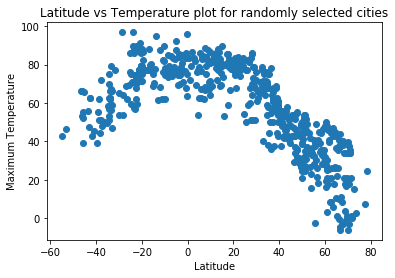

In [9]:
lat_data = city_df["Lat"]
temp_data = city_df["Max Temp"]
plt.scatter(lat_data,temp_data)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs Temperature plot for randomly selected cities")
plt.savefig('../Images/Latitude vs Temperature')
plt.show()

###### The latitude vs max temperature plot is in the shape of inverted bell, we can see that the max temperature is at equator(0 Latitude) and as we move away from the equator the temperature drops. the elongated right tail, further explains that the temperature are low in the northern hemisphere as compared to southern hemisphere.

## Latitude vs. Humidity Plot

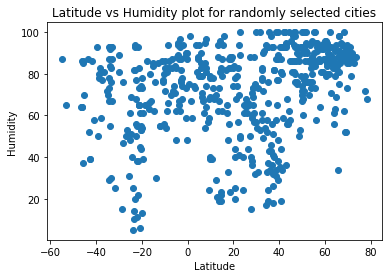

In [10]:
hum_data = city_df["Humidity"]
plt.scatter(lat_data,hum_data)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity plot for randomly selected cities")
plt.savefig('../Images/Latitude vs Humidity')
plt.show()


###### The latitude vs humidity plot is more dense at the top, but otherwise it is spread across the whole image. Hence, it doesn't seem that there is any strong coorelation between these variables. Maybe we should look at other coorelations, e.g. Humidity and Temperature and see how they are correlated and that might explain how latitude(which has a correlation with temperature) effects humidity indirectly.

## Latitude vs. Cloudiness Plot

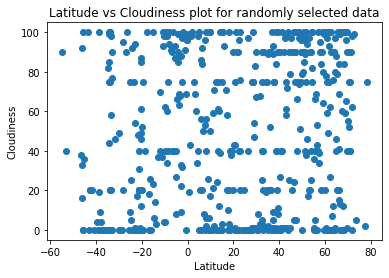

In [11]:
cloud_data = city_df["Cloudiness"]
plt.scatter(lat_data,cloud_data)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness plot for randomly selected data")
plt.savefig('../Images/Latitude vs Cloudiness')
plt.show()

###### The latitude vs Cloudiness plot is spread across the whole image. Hence, it doesn't seem that there is any strong coorelation between these variables. We should look at other coorelations, e.g. Humidity and Cloudiness and see how they are correlated and that might explain how latitude effects cloudiness indirectly.

## Latitude vs. Wind Speed Plot

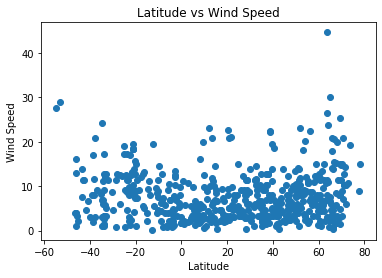

In [12]:
wind_data = city_df["Wind Speed"]
plt.scatter(lat_data,wind_data)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.savefig('../Images/Latitude vs Wind Speed')
plt.show()

###### There doesn't seem to be any correlation between Latitude and Wind Speed from the above plot, we can only say that the wind speed appears to change in a similar manner in both Northern and Southern hemisphere

## Linear Regression

In [13]:
nh_weatherdf  = city_df.loc[city_df["Lat"] >= 0,:]
sh_weatherdf = city_df.loc[city_df["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

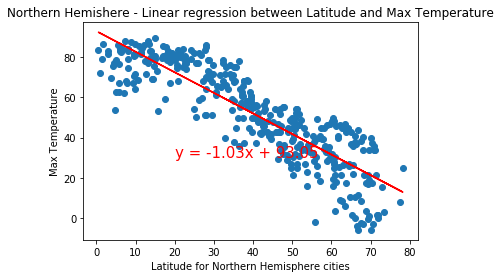

The R Squared value is : 0.757923867998454
Correlation Coefficient for Latitude and Maximum Temperature for cities in Northern Hemisphere is (-0.8705882310245494, 2.4439864925119362e-120)


<Figure size 432x288 with 0 Axes>

In [14]:
nh_lat = nh_weatherdf["Lat"]
nh_temp = nh_weatherdf["Max Temp"]
(slope_nh, intercept_nh, rvalue_nh, pvalue_nh, stderr_nh) = linregress(nh_lat, nh_temp)
regress_values_nh = nh_lat * slope_nh + intercept_nh
line_eq_nh = "y = " + str(round(slope_nh,2)) + "x + " + str(round(intercept_nh,2))
plt.scatter(nh_lat,nh_temp)
plt.plot(nh_lat,regress_values_nh,"r-")
plt.annotate(line_eq_nh,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Northern Hemisphere cities')
plt.ylabel('Max Temperature')
plt.title('Northern Hemishere - Linear regression between Latitude and Max Temperature')
plt.show()
plt.savefig('../Images/Linear RegressionNH - Latitude vs Temperature')
print("The R Squared value is : "+ str(rvalue_nh ** 2))

r_nh = st.pearsonr(nh_lat,nh_temp)
print("Correlation Coefficient for Latitude and Maximum Temperature for cities in Northern Hemisphere is "+ str(r_nh))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

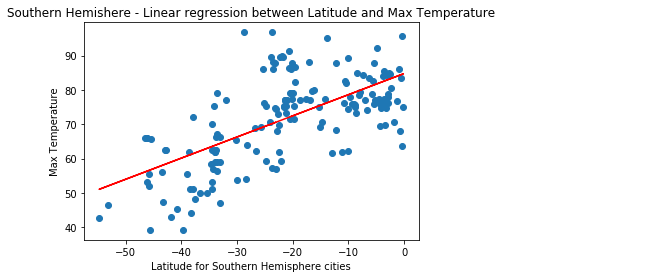

The R Squared value is : 0.42691761357939884
Correlation Coefficient for Latitude and Maximum Temperature for cities in Northern Hemisphere is (0.6533893277207697, 1.4094137315271503e-21)


<Figure size 432x288 with 0 Axes>

In [15]:
sh_lat = sh_weatherdf["Lat"]
sh_temp = sh_weatherdf["Max Temp"]
(slope_sh, intercept_sh, rvalue_sh, pvalue_sh, stderr_sh) = linregress(sh_lat, sh_temp)
regress_values_sh = sh_lat * slope_sh + intercept_sh
line_eq_sh = "y = " + str(round(slope_sh,2)) + "x + " + str(round(intercept_sh,2))
plt.scatter(sh_lat,sh_temp)
plt.plot(sh_lat,regress_values_sh,"r-")
plt.annotate(line_eq_sh,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Southern Hemisphere cities')
plt.ylabel('Max Temperature')
plt.title('Southern Hemishere - Linear regression between Latitude and Max Temperature')
plt.show()
plt.savefig('../Images/Linear RegressionSH - Latitude vs Temperature')
print("The R Squared value is : "+ str(rvalue_sh ** 2))

r_sh = st.pearsonr(sh_lat,sh_temp)
print("Correlation Coefficient for Latitude and Maximum Temperature for cities in Northern Hemisphere is "+ str(r_sh))

###### There appears to be a strong negative correlation between Latitude and  max temperature for northern hemisphere, the strong r-value (-0.87) also confirms this. So as we move away from the equator the temperature drops. Same thing can be said for SH also, but a smaller slope for SH indicates that the temp drop is not as low as it is in NH.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

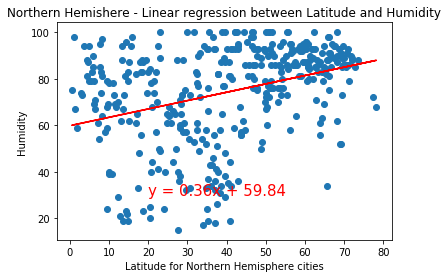

The R Squared value is : 0.11604868266305818
Correlation Coefficient for Latitude and Humidity for cities in Northern Hemisphere is (0.3406591884318668, 6.070559661400077e-12)


<Figure size 432x288 with 0 Axes>

In [16]:
nh_lat = nh_weatherdf["Lat"]
nh_hum = nh_weatherdf["Humidity"]
(slope_nh_hum, intercept_nh_hum, rvalue_nh_hum, pvalue_nh_hum, stderr_nh_hum) = linregress(nh_lat, nh_hum)
regress_values_nh_hum = nh_lat * slope_nh_hum + intercept_nh_hum
line_eq_nh_hum = "y = " + str(round(slope_nh_hum,2)) + "x + " + str(round(intercept_nh_hum,2))
plt.scatter(nh_lat,nh_hum)
plt.plot(nh_lat,regress_values_nh_hum,"r-")
plt.annotate(line_eq_nh_hum,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Northern Hemisphere cities')
plt.ylabel('Humidity')
plt.title('Northern Hemishere - Linear regression between Latitude and Humidity')
plt.show()
plt.savefig('../Images/Linear RegressionNH - Latitude vs Humidity')
print("The R Squared value is : "+ str(rvalue_nh_hum ** 2))

r_nh_hum = st.pearsonr(nh_lat,nh_hum)
print("Correlation Coefficient for Latitude and Humidity for cities in Northern Hemisphere is "+ str(r_nh_hum))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

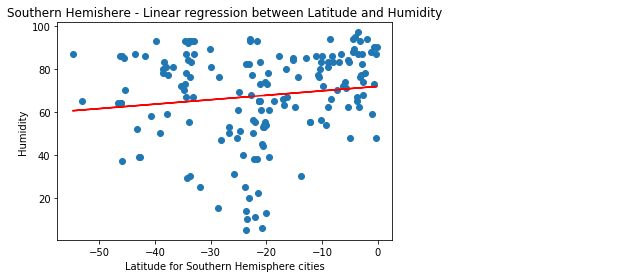

The R Squared value is : 0.0170544369532052
Correlation Coefficient for Latitude and Humidity for cities in Northern Hemisphere is (0.13059263743873625, 0.09353384967734374)


<Figure size 432x288 with 0 Axes>

In [17]:
sh_lat = sh_weatherdf["Lat"]
sh_hum = sh_weatherdf["Humidity"]
(slope_sh_hum, intercept_sh_hum, rvalue_sh_hum, pvalue_sh_hum, stderr_sh_hum) = linregress(sh_lat, sh_hum)
regress_values_sh_hum = sh_lat * slope_sh_hum + intercept_sh_hum
line_eq_sh_hum = "y = " + str(round(slope_sh_hum,2)) + "x + " + str(round(intercept_sh_hum,2))
plt.scatter(sh_lat,sh_hum)
plt.plot(sh_lat,regress_values_sh_hum,"r-")
plt.annotate(line_eq_sh_hum,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Southern Hemisphere cities')
plt.ylabel('Humidity')
plt.title('Southern Hemishere - Linear regression between Latitude and Humidity')
plt.show()
plt.savefig('../Images/Linear RegressionSH - Latitude vs Humidity')
print("The R Squared value is : "+ str(rvalue_sh_hum ** 2))

r_sh_hum = st.pearsonr(sh_lat,sh_hum)
print("Correlation Coefficient for Latitude and Humidity for cities in Northern Hemisphere is "+ str(r_sh_hum))

###### For both NH and SH, the r- value is quite low, also from the above plots we see that data is scattered over the entire image, so it is safe to say that Humidity has no direct strong relation with latitude for both NH and SH

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

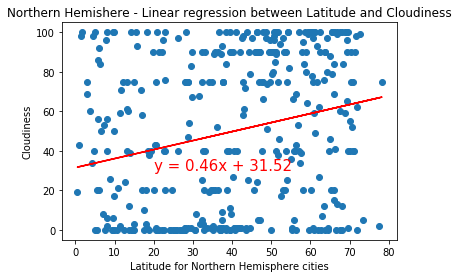

The R Squared value is : 0.054459236199239244
Correlation Coefficient for Latitude and Cloudiness for cities in Northern Hemisphere is (0.23336502779816687, 3.583804358547742e-06)


<Figure size 432x288 with 0 Axes>

In [18]:
nh_lat = nh_weatherdf["Lat"]
nh_cld = nh_weatherdf["Cloudiness"]
(slope_nh_cld, intercept_nh_cld, rvalue_nh_cld, pvalue_nh_cld, stderr_nh_cld) = linregress(nh_lat, nh_cld)
regress_values_nh_cld = nh_lat * slope_nh_cld + intercept_nh_cld
line_eq_nh_cld = "y = " + str(round(slope_nh_cld,2)) + "x + " + str(round(intercept_nh_cld,2))
plt.scatter(nh_lat,nh_cld)
plt.plot(nh_lat,regress_values_nh_cld,"r-")
plt.annotate(line_eq_nh_cld,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Northern Hemisphere cities')
plt.ylabel('Cloudiness')
plt.title('Northern Hemishere - Linear regression between Latitude and Cloudiness')
plt.show()
plt.savefig('../Images/Linear RegressionNH - Latitude vs Cloudiness')
print("The R Squared value is : "+ str(rvalue_nh_cld ** 2))

r_nh_cld = st.pearsonr(nh_lat,nh_cld)
print("Correlation Coefficient for Latitude and Cloudiness for cities in Northern Hemisphere is "+ str(r_nh_cld))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

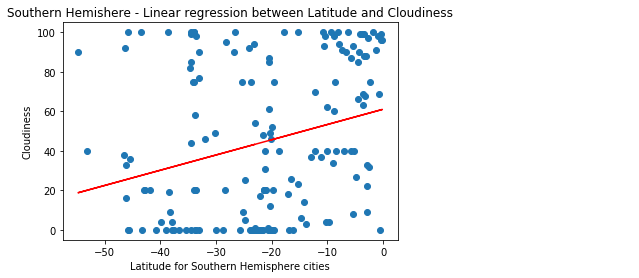

The R Squared value is : 0.07396433780196211
Correlation Coefficient for Latitude and Wind Speed for cities in Northern Hemisphere is (0.2719638538518715, 0.0003932367242231989)


<Figure size 432x288 with 0 Axes>

In [19]:
sh_lat = sh_weatherdf["Lat"]
sh_cld = sh_weatherdf["Cloudiness"]
(slope_sh_cld, intercept_sh_cld, rvalue_sh_cld, pvalue_sh_cld, stderr_sh_cld) = linregress(sh_lat, sh_cld)
regress_values_sh_cld = sh_lat * slope_sh_cld + intercept_sh_cld
line_eq_sh_cld = "y = " + str(round(slope_sh_cld,2)) + "x + " + str(round(intercept_sh_cld,2))
plt.scatter(sh_lat,sh_cld)
plt.plot(sh_lat,regress_values_sh_cld,"r-")
plt.annotate(line_eq_sh_cld,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Southern Hemisphere cities')
plt.ylabel('Cloudiness')
plt.title('Southern Hemishere - Linear regression between Latitude and Cloudiness')
plt.show()
plt.savefig('../Images/Linear RegressionSH - Latitude vs Cloudiness')
print("The R Squared value is : "+ str(rvalue_sh_cld ** 2))

r_sh_cld = st.pearsonr(sh_lat,sh_cld)
print("Correlation Coefficient for Latitude and Wind Speed for cities in Northern Hemisphere is "+ str(r_sh_cld))

###### Like Humidity, cloudiness also doesn't seem to have any significant linear relationship with Latitude for both NH and SH which is evident from low r-values in both cases

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

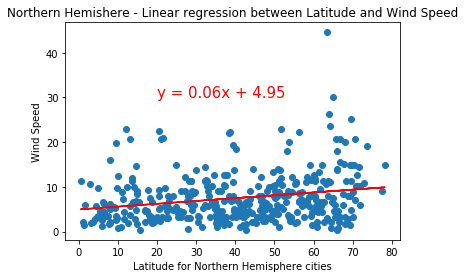

The R Squared value is : 0.05204285286515417
Correlation Coefficient for Latitude and Wind Speed for cities in Northern Hemisphere is (0.22812902679219527, 5.973507806248142e-06)


<Figure size 432x288 with 0 Axes>

In [20]:
nh_lat = nh_weatherdf["Lat"]
nh_wsd = nh_weatherdf["Wind Speed"]
(slope_nh_wsd, intercept_nh_wsd, rvalue_nh_wsd, pvalue_nh_wsd, stderr_nh_wsd) = linregress(nh_lat, nh_wsd)
regress_values_nh_wsd = nh_lat * slope_nh_wsd + intercept_nh_wsd
line_eq_nh_wsd = "y = " + str(round(slope_nh_wsd,2)) + "x + " + str(round(intercept_nh_wsd,2))
plt.scatter(nh_lat,nh_wsd)
plt.plot(nh_lat,regress_values_nh_wsd,"r-")
plt.annotate(line_eq_nh_wsd,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Northern Hemisphere cities')
plt.ylabel('Wind Speed')
plt.title('Northern Hemishere - Linear regression between Latitude and Wind Speed')
plt.show()
plt.savefig('../Images/Linear RegressionNH - Latitude vs Wind Speed')
print("The R Squared value is : "+ str(rvalue_nh_wsd ** 2))

r_nh_wsd = st.pearsonr(nh_lat,nh_wsd)
print("Correlation Coefficient for Latitude and Wind Speed for cities in Northern Hemisphere is "+ str(r_nh_wsd))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

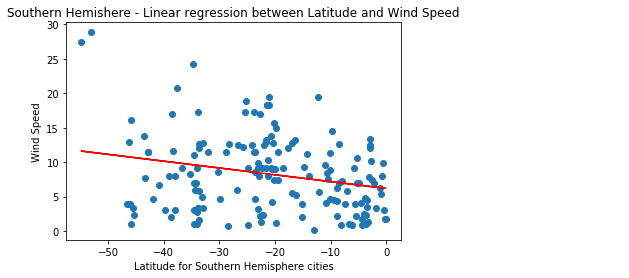

The R Squared value is : 0.058367015419887876
Correlation Coefficient for Latitude and Wind Speed for cities in Northern Hemisphere is (-0.2415926642509823, 0.0017140515171346856)


<Figure size 432x288 with 0 Axes>

In [21]:
sh_lat = sh_weatherdf["Lat"]
sh_wsd = sh_weatherdf["Wind Speed"]
(slope_sh_wsd, intercept_sh_wsd, rvalue_sh_wsd, pvalue_sh_wsd, stderr_sh_wsd) = linregress(sh_lat, sh_wsd)
regress_values_sh_wsd = sh_lat * slope_sh_wsd + intercept_sh_wsd
line_eq_sh_wsd = "y = " + str(round(slope_sh_wsd,2)) + "x + " + str(round(intercept_sh_wsd,2))
plt.scatter(sh_lat,sh_wsd)
plt.plot(sh_lat,regress_values_sh_wsd,"r-")
plt.annotate(line_eq_sh_wsd,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude for Southern Hemisphere cities')
plt.ylabel('Wind Speed')
plt.title('Southern Hemishere - Linear regression between Latitude and Wind Speed')
plt.show()
plt.savefig('../Images/Linear RegressionSH - Latitude vs Wind Speed')
print("The R Squared value is : "+ str(rvalue_sh_wsd ** 2))

r_sh_wsd = st.pearsonr(sh_lat,sh_wsd)
print("Correlation Coefficient for Latitude and Wind Speed for cities in Northern Hemisphere is "+ str(r_sh_wsd))

###### Windspeed also doesn't seem to have any significant linear relationship with Latitude for both NH and SH which is evident from low r-values in both cases